<h1 align="center"><strong>Project 6: Titanic Machine Learning Classification</strong></h1>

<h2 align="center"><strong>Roderick L. Alabado</strong></h2>

<h3 align="center">BSIT-3A</h3>

<h1> BASIC OF MACHINE LEARNING </h1>

<h1> Step 1: Import Libraries </h1>


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



<h1> Step 2: Load Dataset </h1>


In [2]:
df = pd.read_csv('datasets//Titanic.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> Step 3: Explore Dataset </h1>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1> Step 4: Handle Missing Values </h1>


In [5]:
# Check missing
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<h1> Step 5: Encode Categorical Variables </h1>


In [26]:
label = LabelEncoder()

df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])


<h1> Step 6: Feature Selection - Choose X and y </h1>


In [27]:
y = df["Survived"]

X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

X.head(), y.head()


(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0       3    1  22.0      1      0   7.2500         2
 1       1    0  38.0      1      0  71.2833         0
 2       3    0  26.0      0      0   7.9250         2
 3       1    0  35.0      1      0  53.1000         2
 4       3    1  35.0      0      0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

<h1> Step 7: Train-Test Split </h1>


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<h1> Step 8: Train Random Forest Classifier </h1>


In [29]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


<h1> Step 9: Evaluate Random Forest </h1>


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



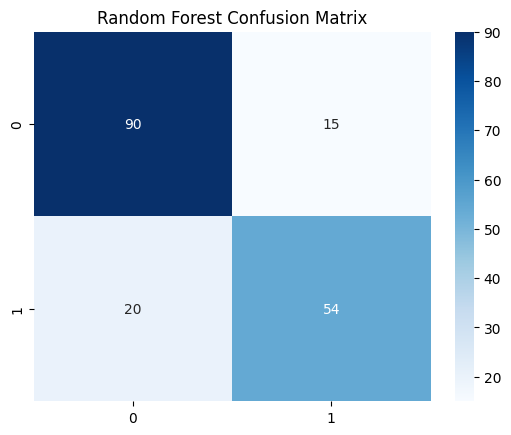

In [30]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()


<h1> Step 10: Feature Importance (Random Forest) </h1>


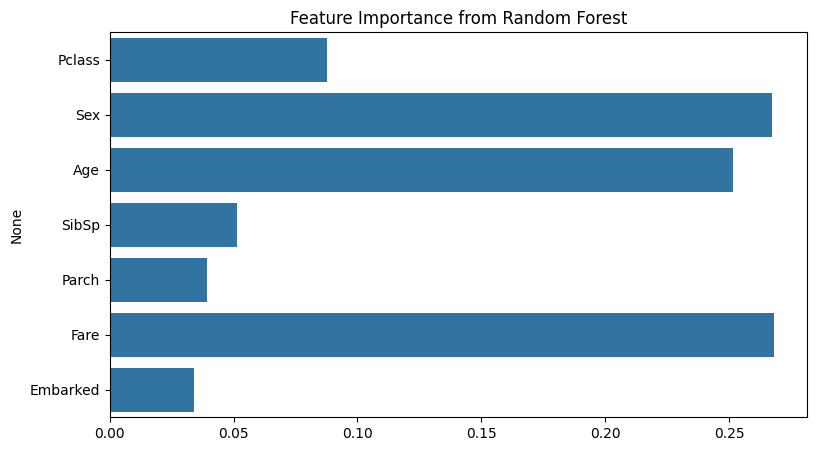

In [31]:
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(9,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance from Random Forest")
plt.show()


Insight from Feature Importance:

Sex is usually the strongest predictor (women survived more)

Pclass strongly influences survival

Fare is linked to wealth → higher survival

Age matters, but less than class & sex

<h1> Step 11: Train Logistic Regression (Predictive Titanic Survivability) </h1>


In [38]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)


<h1> Step 12: Evaluate Logistic Regression </h1>


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



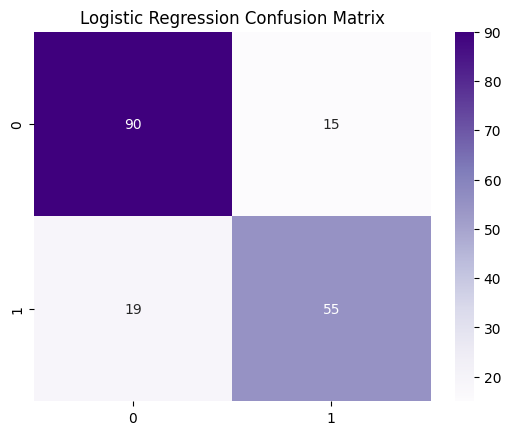

In [39]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


<h1> Step 13: Visualize Survival Patterns </h1>



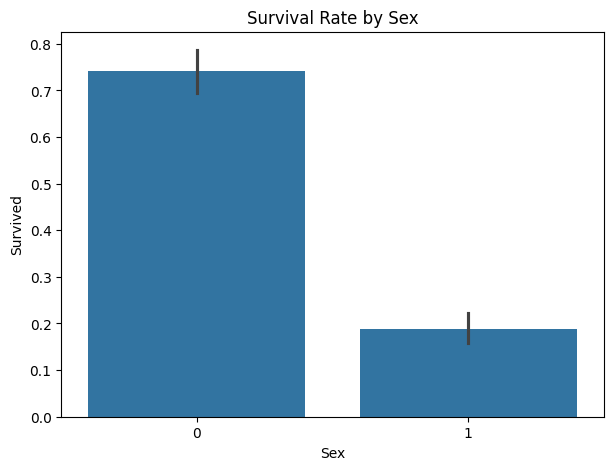

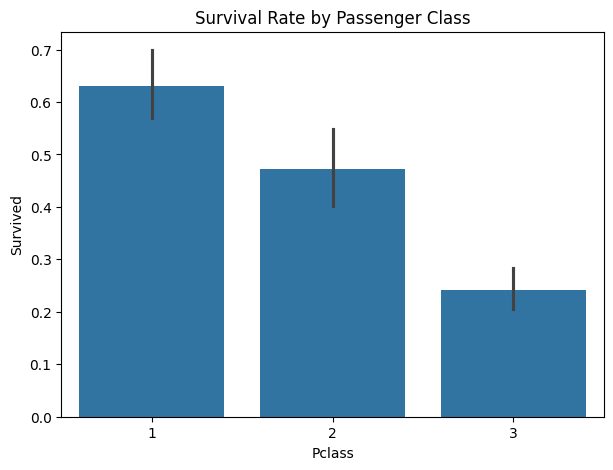

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


Insights

Females survived significantly more than males.

1st class passengers had a far higher survival rate than 3rd class.

Wealth and gender played major roles in survivability.

<h1> Step 14: Model Accuracy Comparison </h1>


In [49]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Random Forest Accuracy: 0.8044692737430168
Logistic Regression Accuracy: 0.8100558659217877
